# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split

In [2]:
random_seed = 54321

## Data

In [3]:
DATA_PATH = '../data/'

df = pd.read_csv(DATA_PATH + '/playground-series-s5e2/train.csv')

In [4]:
df

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed)

# Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [7]:
numeric_cols = ['Compartments', 'Weight Capacity (kg)']
categorical_cols = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']

target = 'Price'

# Data Exploration

## Target

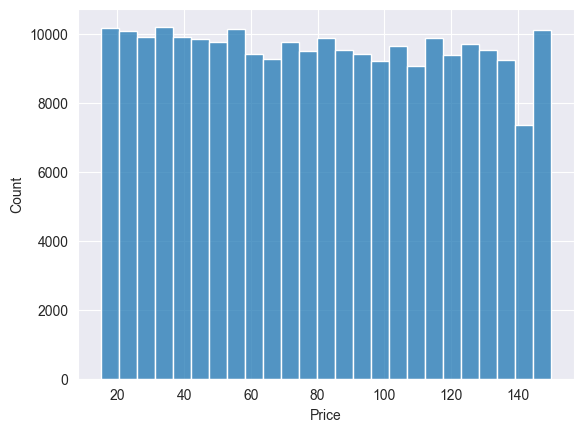

In [8]:
sns.histplot(df_train[target], bins=25)
plt.show()

## Categorical Variables

In [9]:
def get_brand_dummies(df):
    return pd.get_dummies(df['Brand'], drop_first=True, dtype=int, prefix='Brand')

def get_material_dummies(df):
    return pd.get_dummies(df['Material'], drop_first=True, dtype=int, prefix='Material')

def encode_size(df):
    return df['Size'].map({'Small': 0, 'Medium': 1, 'Large': 2}).fillna(1)

def encode_laptop_compartment(df):
    return df['Laptop Compartment'].map({'Yes': 1, 'No': 0}).fillna(0)

def encode_waterproof(df):
    return df['Waterproof'].map({'Yes': 1, 'No': 0}).fillna(0)

def get_style_dummies(df):
    return pd.get_dummies(df['Style'], drop_first=True, dtype=int, prefix='Style')

def get_color_dummies(df):
    return pd.get_dummies(df['Color'], drop_first=True, dtype=int, prefix='Color')

def preprocess_categorical_variables(df):
    output_df = df.copy()
    
    output_df = pd.concat([output_df, get_brand_dummies(output_df)], axis=1)
    output_df = pd.concat([output_df, get_material_dummies(output_df)], axis=1)
    output_df['Size'] = encode_size(output_df)
    output_df['Laptop Compartment'] = encode_laptop_compartment(output_df)
    output_df['Waterproof'] = encode_waterproof(output_df)
    output_df = pd.concat([output_df, get_style_dummies(output_df)], axis=1)
    output_df = pd.concat([output_df, get_color_dummies(output_df)], axis=1)
    
    output_df = output_df.drop(categorical_cols, axis=1)
    
    return output_df

In [10]:
df_train = preprocess_categorical_variables(df_train)
df_test = preprocess_categorical_variables(df_test)

In [11]:
df_test = df_test.reindex(columns=df_train.columns)

## Correlation

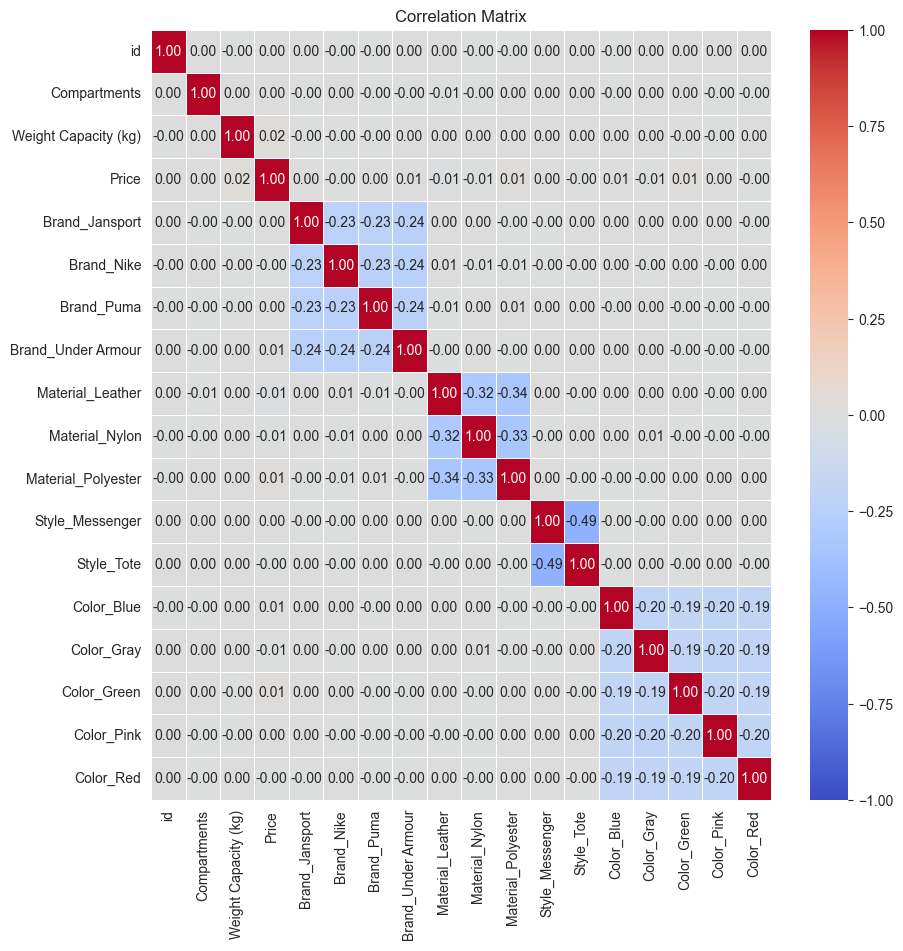

In [18]:
corr_mat = df_train.corr()

plt.figure(figsize=(10, 10))

sns.heatmap(
    corr_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
    vmin=-1, vmax=1
)

plt.title('Correlation Matrix')
plt.show()

# Save Vectors

In [13]:
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

X_train['Weight Capacity (kg)'] = X_train['Weight Capacity (kg)'].fillna(X_train['Weight Capacity (kg)'].mean())
X_test['Weight Capacity (kg)'] = X_test['Weight Capacity (kg)'].fillna(X_train['Weight Capacity (kg)'].mean())

In [14]:


X_train.to_pickle(DATA_PATH + '/X_train.pkl')
X_test.to_pickle(DATA_PATH + '/X_test.pkl')
y_train.to_pickle(DATA_PATH + '/y_train.pkl')
y_test.to_pickle(DATA_PATH + '/y_test.pkl')
